In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [36]:
path = "/content/health222.xlsx"
df = pd.read_excel(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,0,48,20,0,24.7,0.140,22,0
1,1,0,74,20,23,27.7,0.299,21,0
2,1,0,68,35,0,32.0,0.389,22,0
3,5,0,80,32,0,41.0,0.346,37,1
4,6,0,68,41,0,39.0,0.727,41,1


In [13]:
# Calculate basic descriptive statistics
print("Mean:\n", df.mean())

Mean:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [14]:
print("\nMedian:\n", df.median())


Median:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [15]:
print("\nMode:\n", df.mode().iloc[0])


Mode:
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age                         22.000
Outcome                      0.000
Name: 0, dtype: float64


In [16]:
print("\nStandard Deviation:\n", df.std())


Standard Deviation:
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


In [17]:
print("\nVariance:\n", df.var())


Variance:
 Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


In [18]:
# Additional descriptive statistics
print("\nRange:\n", df.max() - df.min())


Range:
 Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64


In [19]:
print("\nSkewness:\n", df.skew())


Skewness:
 Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [20]:
print("\nKurtosis:\n", df.kurt())


Kurtosis:
 Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


In [32]:
import scipy.stats as stats

# Select the feature for analysis
feature = 'BMI'  # Replace with your desired feature

# Define the hypothesized value
hypothesized_value = 29.42699440206 # Replace with your hypothesized value

# Extract the data for the selected feature
data = df[feature]

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, hypothesized_value)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")
# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_of_freedom = len(data) - 1
# Print the confidence interval
print(f"95% Confidence Interval for the mean of {feature}: {confidence_interval}")

T-statistic: 9.018023335156489
P-value: 1.509528057520365e-18
Reject the null hypothesis. There is a significant difference.
95% Confidence Interval for the mean of BMI: (31.43409662818411, 32.55105962181588)


In [39]:
# Separate the data into two groups
Gdisease = df[df['Pregnancies'] == 1]['BloodPressure']
Ggdisease = df[df['Pregnancies'] == 0]['BloodPressure']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(Gdisease, Ggdisease)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: 0.25
P-Value: 0.8012


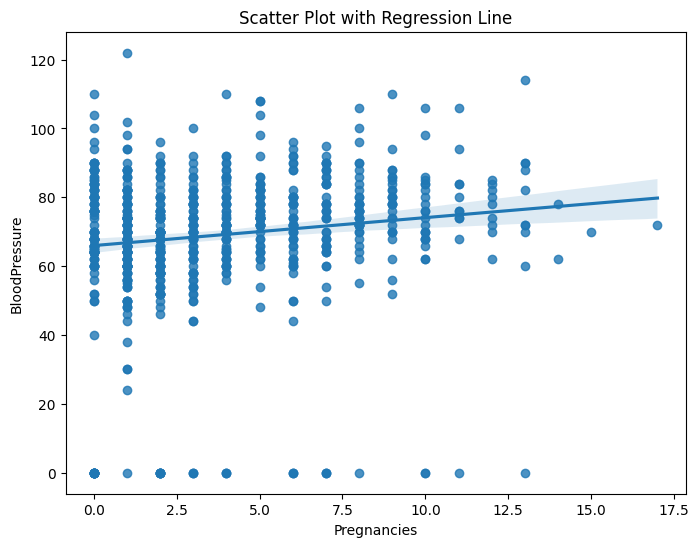

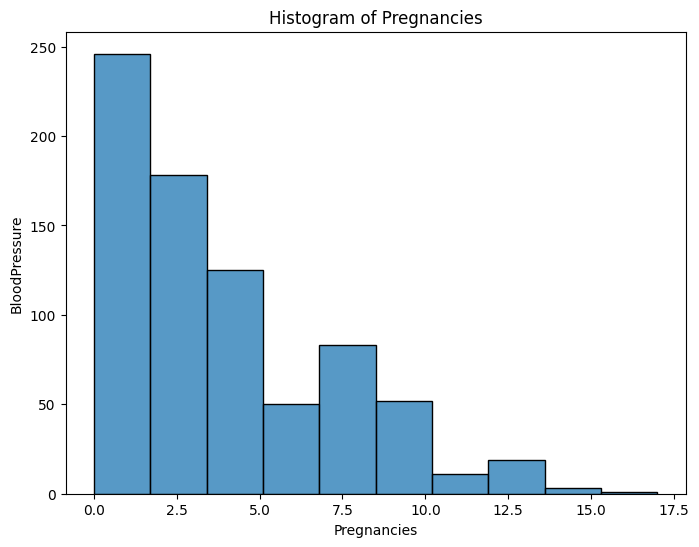

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Pregnancies', y='BloodPressure', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Pregnancies')
plt.ylabel('BloodPressure')
plt.show()

# Histogram of Pregnancies
plt.figure(figsize=(8, 6))
sns.histplot(df['Pregnancies'], bins=10)
plt.title('Histogram of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('BloodPressure')
plt.show()